In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from n_armed_testbed import NArmedTestbed

In [3]:
plt.style.use('seaborn')

In [4]:
K = 10

### Epsilon greedy

In [5]:
from models.epsilon_greedy_sample_average import EpsilonGreedySampleAverage

In [6]:
rewards_dict = {}
choices_dict = {}
for eps in [0, 0.1, 0.01]:
    rl_method = EpsilonGreedySampleAverage(K=K, Q0=0, eps=eps)
    testbed = NArmedTestbed(N=2000, K=K, solver=rl_method)
    rewards, choices = testbed.run(1000)
    rewards_dict[eps] = rewards
    choices_dict[eps] = choices

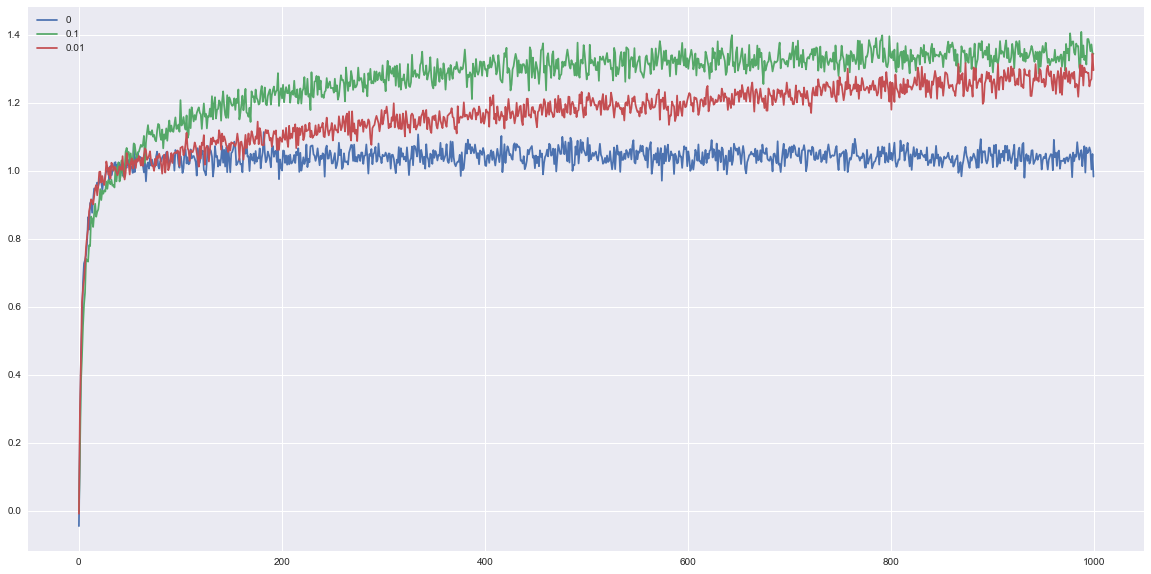

In [8]:
plt.subplots(figsize=(20, 10))
for key, value in rewards_dict.items():
    plt.plot(value.mean(axis=0), label=str(key))
plt.legend()
plt.show()

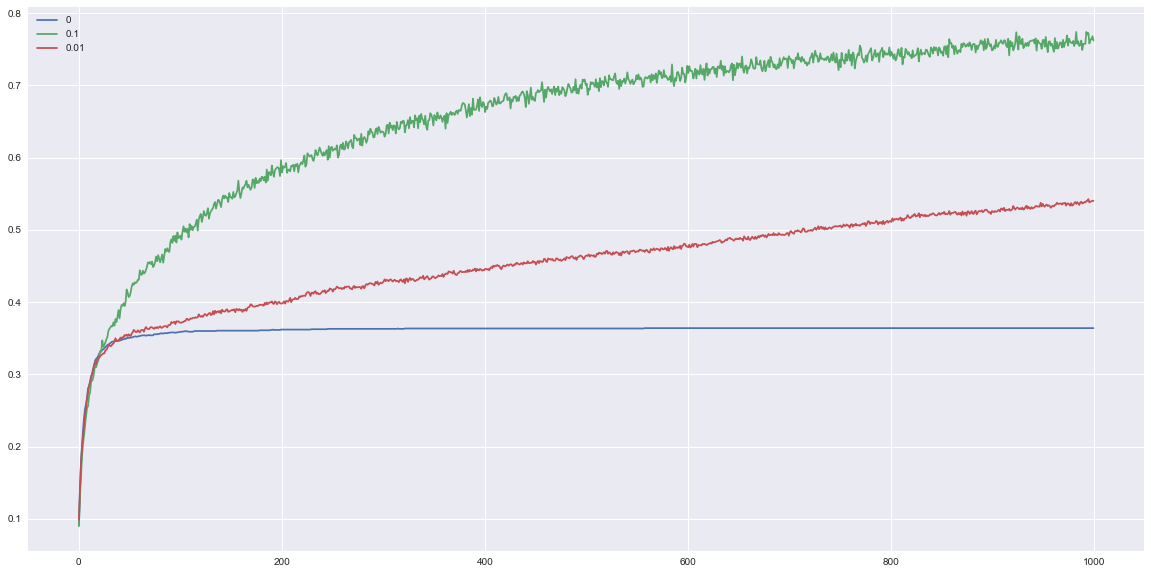

In [9]:
plt.subplots(figsize=(20, 10))
for key, value in choices_dict.items():
    plt.plot(value.mean(axis=0), label=str(key))
plt.legend()
plt.show()

### Optimistic Intial Values

In [10]:
from models.epsilon_greedy_sample_average import EpsilonGreedySampleAverage

In [11]:
rewards_dict = {}
choices_dict = {}
for eps, Q0 in [(0, 5), (0.1, 0)]:
    rl_method = EpsilonGreedySampleAverage(K=K, Q0=Q0, eps=eps)
    testbed = NArmedTestbed(N=2000, K=K, solver=rl_method)
    rewards, choices = testbed.run(1000)
    rewards_dict[eps] = rewards
    choices_dict[eps] = choices

TypeError: 'int' object is not iterable

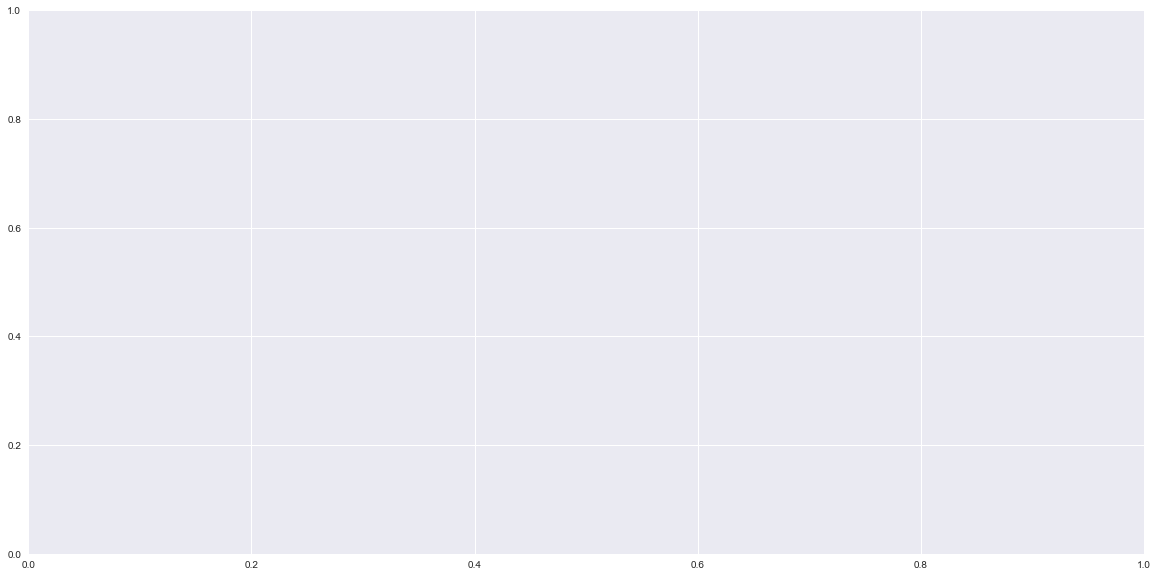

In [12]:
plt.subplots(figsize=(20, 10))
for key, value in rewards_dict.items():
    plt.plot(value.mean(axis=0), label=", ".join([str(k) for k in key]))
plt.legend()
plt.show()

In [ ]:
plt.subplots(figsize=(20, 10))
for key, value in choices_dict.items():
    plt.plot(value.mean(axis=0), label=", ".join([str(k) for k in key]))
plt.legend()
plt.show()

### Upper Confidence Bound

In [ ]:
from models.ucb_sample_average import UcbSampleAverage
from models.epsilon_greedy_sample_average import EpsilonGreedySampleAverage

In [ ]:
rewards_dict = {}
choices_dict = {}

rl_method = UcbSampleAverage(K=K, c=2, Q0=0)
testbed = NArmedTestbed(N=2000, K=K, solver=rl_method)
rewards, choices = testbed.run(1000)
rewards_dict["UCB, c=2"] = rewards
choices_dict["UCB, c=2"] = choices

rl_method = EpsilonGreedySampleAverage(K=K, Q0=0, eps=0.1)
testbed = NArmedTestbed(N=2000, K=K, solver=rl_method)
rewards, choices = testbed.run(1000)
rewards_dict["eps-greedy, eps=0.1"] = rewards
choices_dict["eps-greedy, eps=0.1"] = choices

In [ ]:
plt.subplots(figsize=(20, 10))
for key, value in rewards_dict.items():
    plt.plot(value.mean(axis=0), label=str(key))
plt.legend()
plt.show()

In [ ]:
plt.subplots(figsize=(20, 10))
for key, value in choices_dict.items():
    plt.plot(value.mean(axis=0), label=str(key))
plt.legend()
plt.show()

### Gradient bandits

In [ ]:
from models.gradient_bandits import GradientBandits 

In [ ]:
rewards_dict = {}
choices_dict = {}
for alpha, baseline in [(0.4, True), (0.4, False), (0.1, True), (0.1, False)]:  #, 0.1, 0.01]:
    rl_method = GradientBandits(K=K, use_baseline=baseline)
    testbed = NArmedTestbed(N=2000, K=K, solver=rl_method, mean=4)
    rewards, choices = testbed.run(1000, alpha=alpha)
    rewards_dict[(alpha, baseline)] = rewards
    choices_dict[(alpha, baseline)] = choices

In [ ]:
plt.subplots(figsize=(20, 10))
for key, value in rewards_dict.items():
    plt.plot(value.mean(axis=0), label=", ".join([str(k) for k in key]))
plt.legend()
plt.show()

In [ ]:
plt.subplots(figsize=(20, 10))
for key, value in choices_dict.items():
    plt.plot(value.mean(axis=0), label=", ".join([str(k) for k in key]))
plt.legend()
plt.show()